In [1]:
#import machine learning and data science libarires
import math
import pandas as pd
import numpy as np

#import Yahoo Finanace API libraries
from googlefinance.client import get_price_data, get_prices_data, get_prices_time_data

#import data visualization libraries
import matplotlib.pyplot as plt

#import other libraries
import datetime as dt

In [2]:
#set the benchmarl dates
strt_date = '1995-01-01'
end_date = '2015-06-18'

In [3]:
#set all the tickers
my_params = {
'q': "AAPL", #stock symbol (ex: "AAPL")
'i': "86400", #interval size in seconds ("86400" = 1 day intervals)
'x': "INDEXAAPL", #stock exchange symbol on which stock is traded (ex: "NASD")
'p': "5Y" #period (ex: "1Y" = 1 year)
}

#build the dataframe of the stock data
my_stck = get_price_data(my_params)

#reset the indexes
my_stck = my_stck.reset_index()
print(my_stck.head())

                index    Open    High    Low   Close     Volume
0 2012-09-28 16:00:00  96.964  97.301  95.25  95.301  133777077
1 2012-10-01 16:00:00  95.880  96.680  93.79  94.200  135895921
2 2012-10-02 16:00:00  94.540  95.190  92.95  94.470  156997638
3 2012-10-03 16:00:00  94.980  95.980  94.66  95.920  106069719
4 2012-10-04 16:00:00  95.890  96.320  95.08  95.260   92688813


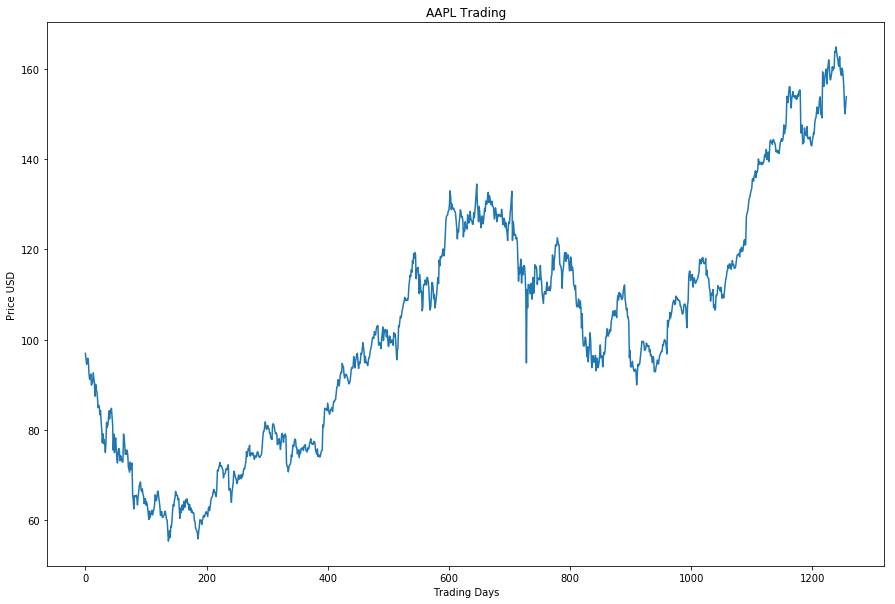

In [4]:
#Plot Basic Data
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(my_stck.index, my_stck['Open'])

# format the coords message box
price = lambda x : '$%1.2f' % x

#plt.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.format_ydata = price
ax.set_title('AAPL' + ' Trading')

## Add labels
plt.ylabel('Price USD')
plt.xlabel('Trading Days')

plt.show()

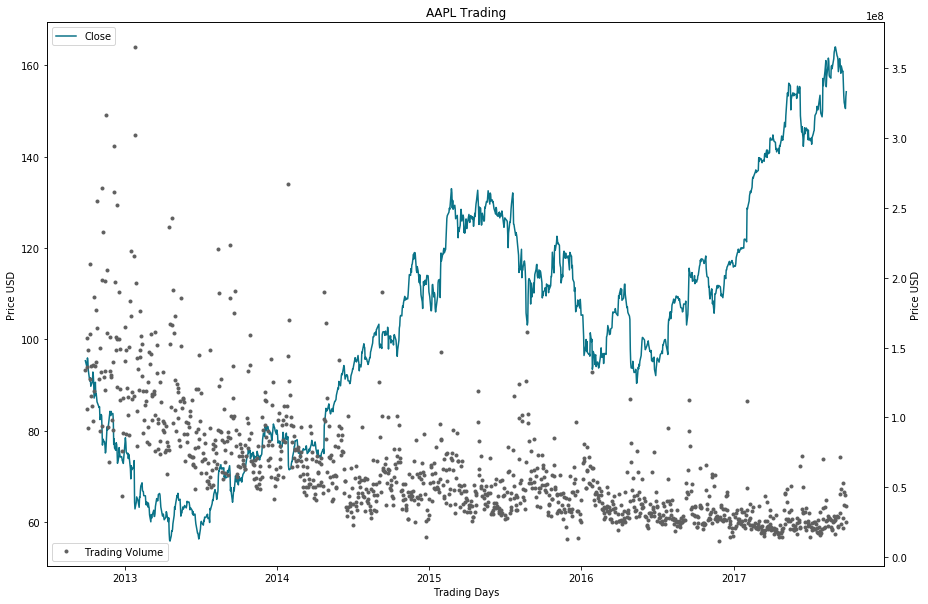

In [5]:
#plot raw data
fig, ax1 = plt.subplots(figsize=(15, 10))

#axis 1 - close prices
ax1.plot(my_stck['index'], my_stck['Close'], '#0A7388', label='Close')
#set x-axis label
ax1.set_xlabel('Trading Days')
#set y-axis label
ax1.set_ylabel('Price USD')

#axis 2 - volume
ax2 = ax1.twinx()
ax2.plot(my_stck['index'], my_stck['Volume'], 'r.', color='#5f5f5f', label='Trading Volume')
# Set Y Axis label
ax2.set_ylabel('Volume')

#add labels
plt.ylabel('Price USD')
plt.xlabel('Trading Days')

#add title and legend
ax1.set_title('AAPL' + ' Trading')
ax1.legend(loc='upper left')
ax2.legend(loc='lower left')

plt.show()

In [6]:
#create a new DataFrame with close delta and volume for corelation
new_df = pd.DataFrame()

# Pull out necessary comparison data from stock data
close_ys = my_stck['Close'][:-1].reset_index()
close_td = my_stck['Close'][1:].reset_index()
volume_td = my_stck['Volume'][1:].reset_index()

#add factors to dataframe
new_df['Close_prcnt'] = (close_td['Close']-close_ys['Close'])/close_ys['Close']
new_df['Volume'] = volume_td['Volume']

print(new_df.head())

   Close_prcnt     Volume
0    -0.011553  135895921
1     0.002866  156997638
2     0.015349  106069719
3    -0.006881   92688813
4    -0.021310  148501108


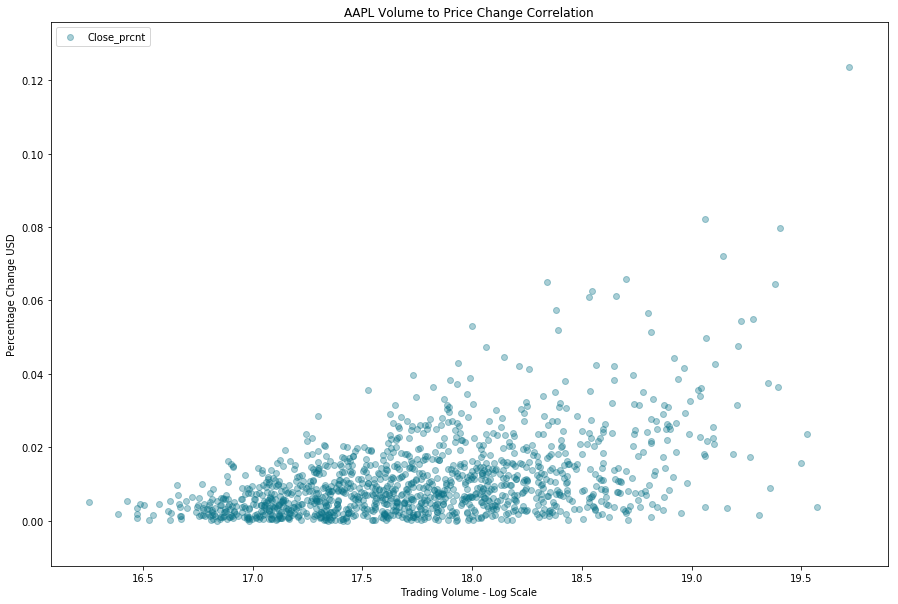

In [7]:
# Scale the data with natural log
plot_vol = np.log(new_df['Volume'])
plot_prcnt = np.abs(new_df['Close_prcnt'])

#plot Volume to Value Delta 
fig, ax1 = plt.subplots(figsize=(15, 10))
#axis 1 - Adjusted Close
ax1.scatter(plot_vol, plot_prcnt, c='#0A7388', alpha=0.35)

#set x-axis label
ax1.set_xlabel('Trading Volume - Log Scale')
#set y-axis label
ax1.set_ylabel('Percentage Change USD')

#add title and legend
ax1.set_title('AAPL' + ' Volume to Price Change Correlation')
ax1.legend(loc='upper left')

plt.show()

   Close_prcnt     Volume
0    -0.008720  156997638
1     0.018259  106069719
2     0.008362   92688813
3    -0.028044  148501108
4    -0.042935  159494867


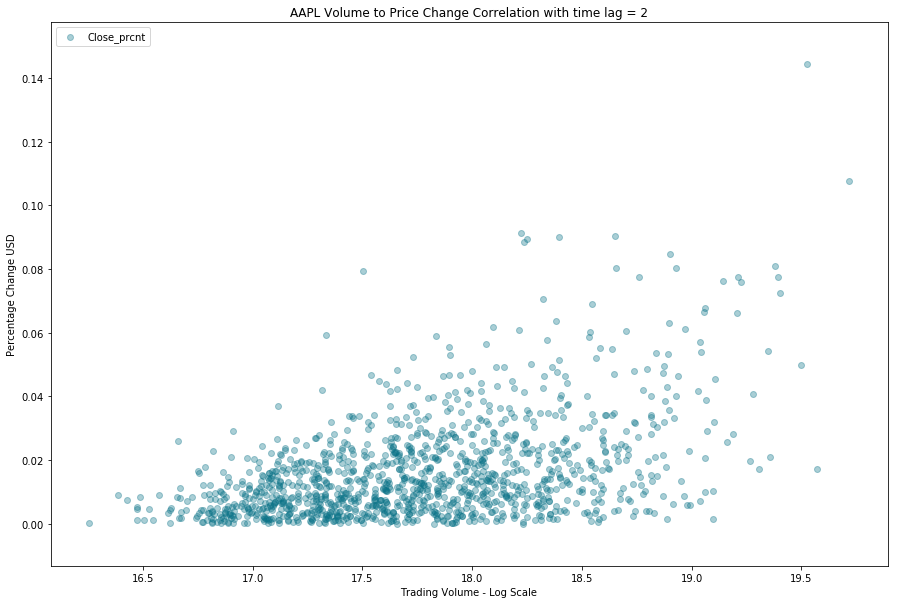

In [27]:
#create a new DataFrame with close delta and volume for corelation
new_df = pd.DataFrame()

#time lag
time_lag = 2

# Pull out necessary comparison data from stock data
close_ys = my_stck['Close'][:-time_lag].reset_index()
close_td = my_stck['Close'][time_lag:].reset_index()
volume_td = my_stck['Volume'][time_lag:].reset_index()

#add factors to dataframe
new_df['Close_prcnt'] = (close_td['Close']-close_ys['Close'])/close_ys['Close']
new_df['Volume'] = volume_td['Volume']

print(new_df.head())

# Scale the data with natural log
plot_vol = np.log(new_df['Volume'])
plot_prcnt = np.abs(new_df['Close_prcnt'])

#plot Volume to Value Delta 
fig, ax1 = plt.subplots(figsize=(15, 10))
#axis 1 - Adjusted Close
ax1.scatter(plot_vol, plot_prcnt, c='#0A7388', alpha=0.35)

#set x-axis label
ax1.set_xlabel('Trading Volume - Log Scale')
#set y-axis label
ax1.set_ylabel('Percentage Change USD')

#add title and legend
ax1.set_title('AAPL' + ' Volume to Price Change Correlation' + ' with time lag = ' + str(time_lag))
ax1.legend(loc='upper left')

plt.show()